## 다수결 방법

In [40]:
%matplotlib inline

In [24]:
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier


data = load_iris()
X = data.data[:,:]
y = data.target[:]

In [27]:
model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3), ('dt', model4)], voting='soft')

In [28]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv).mean()

0.9666666666666666

## 배깅

In [31]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
X2 = bc.data
y2 = bc.target

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# 배깅할때
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100).fit(X2, y2)

from sklearn.model_selection import cross_val_score

cross_val_score(model2, X2, y2, scoring="accuracy", cv=5).mean()

0.9262071106970966

In [32]:
# 하나만 할때
cross_val_score(DecisionTreeClassifier(max_depth=1), X2, y2, scoring="accuracy", cv=5).mean()

0.8998447446048751

## 랜덤포레스트

In [43]:
# 연습문제 1

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

model1 = LogisticRegression()
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model = VotingClassifier(
    estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
    voting='soft', weights=[1, 1.5, 1])

cv = KFold(5, shuffle=True, random_state=0)
accuracy = cross_val_score(model, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

(0.9701288619779536, 0.01718014420762386)

In [44]:
from sklearn.ensemble import BaggingClassifier

model1 = DecisionTreeClassifier(max_depth=5)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
accuracy1 = cross_val_score(model1, X, y, scoring="accuracy", cv=cv)
accuracy2 = cross_val_score(model2, X, y, scoring="accuracy", cv=cv)
accuracy1.mean(), accuracy1.std(), accuracy2.mean(), accuracy2.std()

(0.9367800031051079,
 0.02559674186570539,
 0.9561092997981679,
 0.014622602276360136)

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=500, random_state=0).fit(X, y)
accuracy = cross_val_score(forest, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

(0.9701754385964911, 0.020459480332790547)

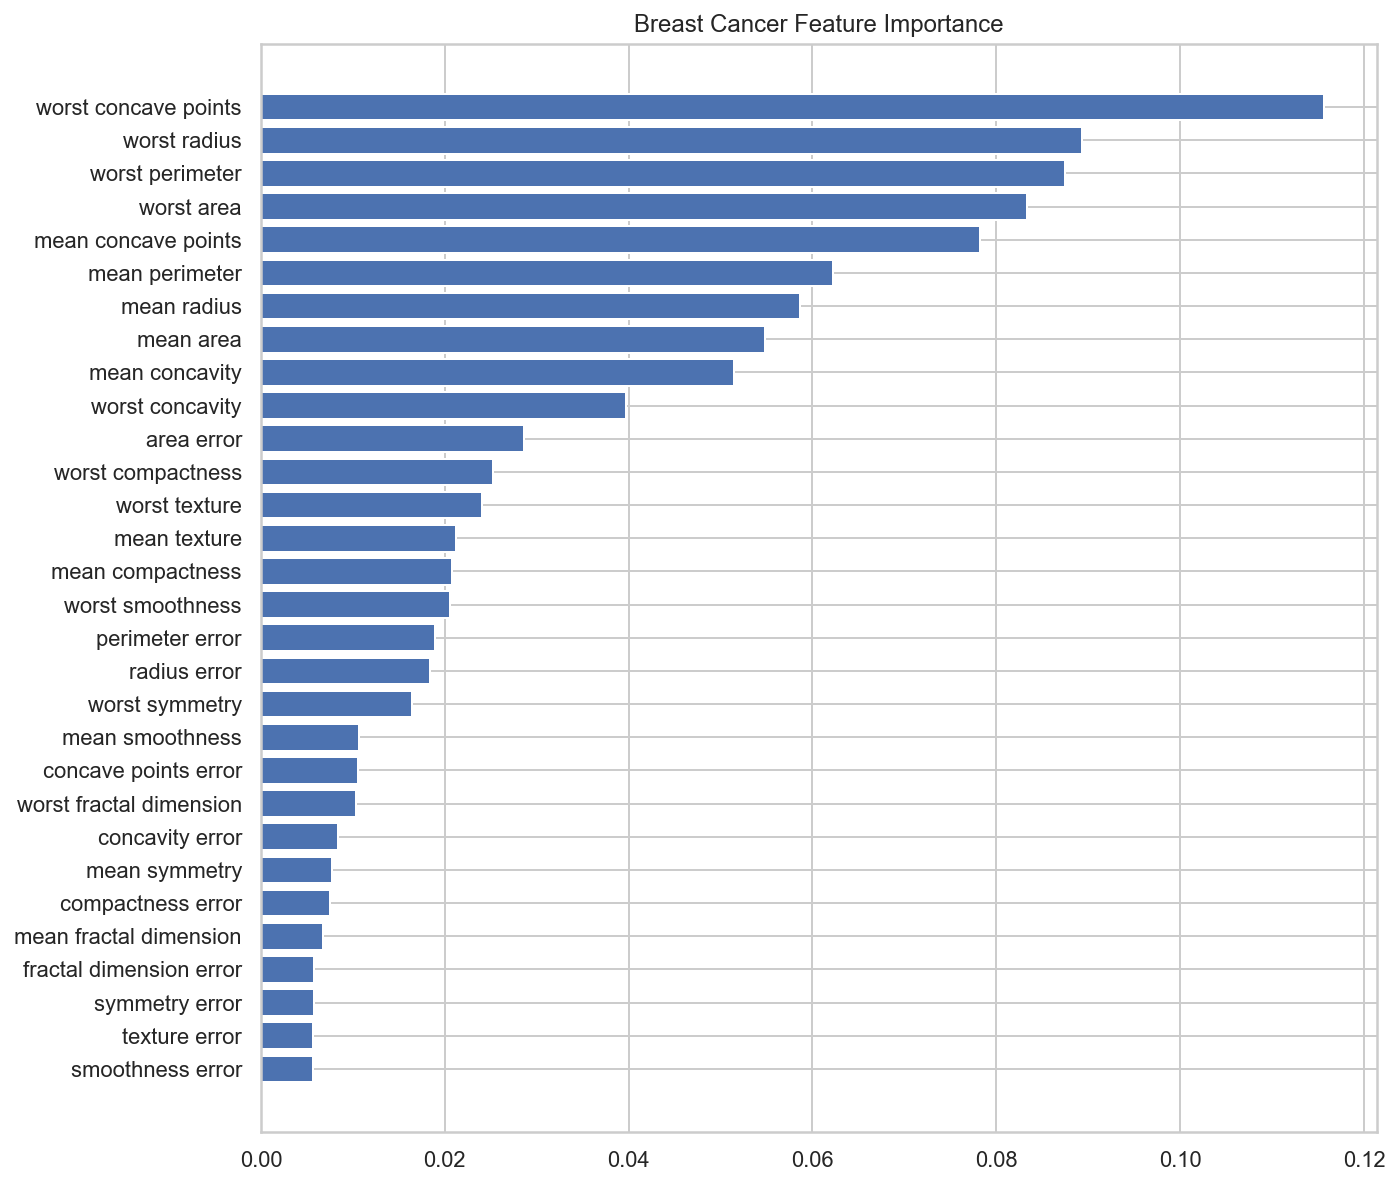

In [46]:
idx = np.argsort(forest.feature_importances_)
names = cancer.feature_names[idx]
values = forest.feature_importances_[idx]

plt.figure(figsize=(10, 10))
plt.barh(names, values)
plt.title("Breast Cancer Feature Importance")
plt.show()